# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 3: Badanie intensywności procesów punktowych (część 2)

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [6]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        Na przykład: [array([[7, 2], [4, 5]]), array([0, 1, 2]), array([0, 1, 2])]
    """
    xedges = np.linspace(x_lim[0], x_lim[1], bins[0] + 1)
    yedges = np.linspace(y_lim[0], y_lim[1], bins[1] + 1)
    
    count, xedges, yedges = np.histogram2d(points["X"], points["Y"], bins=[xedges, yedges])
    
    return [count.T, xedges, yedges]

### Wczytanie danych

Załączone do notatnika pliki zawierają trzy różne rozkłady punktowe (`points_1`, `points_2` i `points_3`) wygenerowane dla zakresu współrzędnych X $[10, 30]$ i Y $[-15, -5]$ oraz dane wykorzystywane w zawartych w notatniku automatycznych testach.

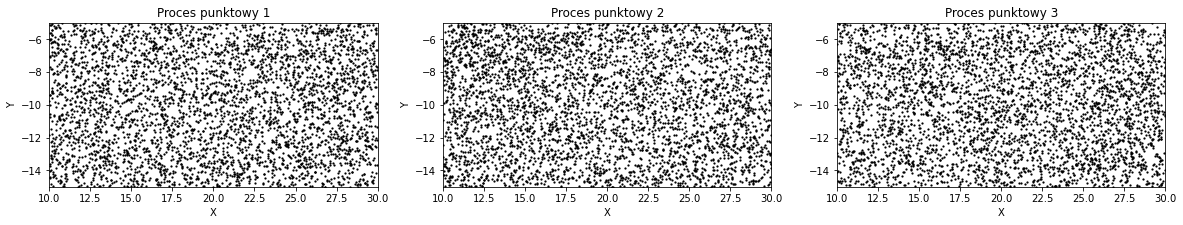

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [8]:
points_1 = pd.read_pickle('points_1.pkl')
points_2 = pd.read_pickle('points_2.pkl')
points_3 = pd.read_pickle('points_3.pkl')

test_data_1 = np.load("test_data_1.npy")
test_data_2 = np.load("test_data_2.npy")
test_data_3 = pd.read_pickle('test_data_3.pkl')

### Zadanie 1: Test chi-kwadrat Pearsona (18 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `pearsons_chi2_test()`, która będzie przeprowadzać test istotności chi-kwadrat Pearsona i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem oraz funkcje pomocnicze `distribution_table()` i `poisson_distribution_table()`, które będą przygotowywać szeregi rozdzielcze testowanego rozkładu oraz teoretycznego rozkładu Poissona.

Algorytm postępowania:
1. Przygotowanie danych
    - Dzielimy analizowany obszar na identyczne podobszary ułożone w równomiernej siatce (w wierszach i kolumnach) i zliczamy punkty znajdujące się w poszczególnych podobszarach (punkty znajdujące się na granicach podobszarów powinny być zliczone tylko do jednego z nich).
    - Określamy jaka jest minimalna i maksymalna liczba punktów zaobserwowana w obrębie podobszaru, a następnie zliczamy w ilu podobszarach występują kolejne liczby punktów od wartości minimalnej do wartości maksymalnej uwzględniając również te wartości zliczeń, które nie występują w żadnym z podobszarów.
    - Dla wszystkich wartości z zakresu od wartości minimalnej do maksymalnej wyliczamy prawdopodobieństwa ich wystąpienia w przypadku, gdyby rozkład był rozkładem teoretycznym do którego porównujemy analizowany rozkład ustandaryzowane do sumy równej 1. Następnie przeliczamy prawdopodobieństwa do liczebności teoretycznych mnożąc ich wartości przez liczbę obserwacji (w tym przypadku jest to liczba podobszarów).

2. Test statystyczny
    - Formułujemy hipotezę zerową H0 i hipotezę alternatywną H1: <br/>
    H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
    H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
    - Obliczamy wartość parametru pvalue
    - Podejmujemy decyzję weryfikującą: <br/>
    pvalue < alpha - Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A <br/>
    pvalue >= alpha - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A

Funkcja `pearsons_chi2_test()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- nazwę wykonywanego testu,
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- wartości wyznaczonych statystyk pvalue i alpha,
- zależność między statystykami pvalue i alpha, na podstawie której została podjęta decyzja,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = A".

Wszystkie występujące w komunikacie wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (6 miejsc po przecinku w przypadku pvalue, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu:
<br/>
`Test chi-kwadrat Pearsona` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`pvalue = 0.093543, alpha = 0.05`<br/>
`pvalue >= alpha`<br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95` <br/>

Uwagi do wykonania zadania:
- W części zadania dotyczącej podziału obszaru analizy na podobszary i zliczenia znajdujących się w nich punktów nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `point_count_on_subregions()`, którą można wkleić we wskazanej komórce na początku notatnika.
- Podczas wyznaczania wartości pvalue należy skorzystać z funkcji `scipy.stats.chisquare()`.

In [10]:
def distribution_table(bin_counts):
    """
    Parameters
    -------
    bin_counts: array
        Macierz 2D z liczbą punków przypisanych do każdego z podobszarów.

    Returns
    -------
    table: DataFrame
        Tablica zawierająca 2 kolumny:
        - "K", która zawiera wszystkie wartości całkowite z zakresu od minimalnej do maksymalnej liczby zliczeń w obrębie podobszarów,
        - "N(K)", która zawiera liczby podobszarów, którym zostały przypisane poszczególne liczby punktów.
    """    
    flat = bin_counts.flatten().tolist()
    min_k = min(flat)
    max_k = max(flat)
    df_k = list(range(int(min_k), int(max_k)+1))
    #print(np.unique(flat, return_counts=True)[1])
    df_nk=[]
    for i in df_k:
         df_nk.append(flat.count(i))  
    print(df_nk)
    df = pd.DataFrame({"K":df_k,"N(K)":df_nk})
    
    return(df)

def poisson_distribution_table(k, mu, n):
    """
    Parameters
    -------
    k: array
        Macierz 1D z wariantami badanej cechy, dla którym ma zostać wyliczone prawdopodobieństwo.
    mu: int
        Wartość oczekiwana rozkładu Poissona.
    n: int
        Liczba podobszarów w analizowanym przypadku.

    Returns
    -------
    table: DataFrame
        Tablica zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy,
        - "N(K)", która zawiera wartości teoretycznych liczebności rozkładu Poissona wyliczone dla wartości oczekiwanej mu i liczby podobszarów n.
    """  
    probab = sp.stats.poisson.pmf(k,mu)
    probab_normalised = probab/sum(probab)
    n_k = probab_normalised*n
    df_poisson = pd.DataFrame({"K": k, "N(K)": n_k})
    
    return(df_poisson)
                               
    
def pearsons_chi2_test(tested_distribution, theoretical_distribution, alpha):
    """
    Parameters
    -------
    tested_distribution: DataFrame
        Tablica opisująca testowany rozkład i zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy, wartości muszą być identycznej jak kolumna "K" zmiennej lokalnej theoretical_distribution,
        - "N(K)", która zawiera liczebności poszczególnych wariantów badanej cechy.
    theoretical_distribution: DataFrame
        Tablica opisująca rozkład teoretyczny i zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy, wartości muszą być identycznej jak kolumna "K" zmiennej lokalnej tested_distribution,
        - "N(K)", która zawiera wartości teoretycznych liczebności rozkładu Poissona.  
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności. 
   
    Returns
    -------
    pvalue: float
        Wyliczona wartość statystyki pvalue.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    chi_kwadrat = sp.stats.chisquare(tested_distribution["N(K)"], theoretical_distribution["N(K)"])
    p_value = chi_kwadrat[1]
    print("Test chi-kwadrat Pearsona \nH0: Testowana zmienna ma przyjęty rozkład teoretyczny \nH1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego")
    print("pvalue = {pvalue}, alpha = {alpha}".format(pvalue = round(p_value,6), alpha = alpha))
   
    if (p_value < alpha):
        H = 1
        print("pvalue < alpha")
        print("Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = {A}".format(A = 1-alpha))
    else:
        H = 0
        print("pvalue >= alpha") 
        print("Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = {A}".format(A=1-alpha))
    return(p_value, H)
        
test_distribution_table_1 = distribution_table(test_data_1)   
test_poisson_distribution_table_1 = poisson_distribution_table(test_distribution_table_1["K"], 5, np.size(test_data_1))

pearsons_chi2_test(test_distribution_table_1, test_poisson_distribution_table_1, 0.1)

[8, 15, 19, 42, 39, 28, 24, 13, 7, 3, 2]
Test chi-kwadrat Pearsona 
H0: Testowana zmienna ma przyjęty rozkład teoretyczny 
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.833954, alpha = 0.1
pvalue >= alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.9


(0.833953591213181, 0)

In [11]:
# Komórka testowa
# Testy funkcji distribution_table()
test_distribution_table_1 = distribution_table(test_data_1)
test_distribution_table_2 = distribution_table(test_data_2)

assert type(test_distribution_table_2) == pd.DataFrame
assert test_distribution_table_2.shape == (14, 2)
assert list(test_distribution_table_2.columns) == ["K", "N(K)"]
assert np.all(np.isclose(test_distribution_table_2["K"].values, np.array([0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])))
assert np.all(np.isclose(test_distribution_table_2["N(K)"].values, np.array([1., 12., 28., 20., 29., 35., 33., 15., 13.,  8.,  3.,  0.,  2., 1.])))

# Testy funkcji poisson_distribution_table()
test_poisson_distribution_table_1 = poisson_distribution_table(test_distribution_table_1["K"], 5, np.size(test_data_1))
test_poisson_distribution_table_2 = poisson_distribution_table(test_distribution_table_2["K"], 5, np.size(test_data_2))

assert type(test_poisson_distribution_table_2) == pd.DataFrame
assert test_poisson_distribution_table_1.shape == (11, 2)
assert list(test_poisson_distribution_table_1.columns) == ["K", "N(K)"]
assert np.all(np.isclose(test_poisson_distribution_table_1["K"].values, np.array([1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])))
assert np.all(np.isclose(test_poisson_distribution_table_1["N(K)"].values, np.array([6.82110334, 17.05275834, 28.4212639, 35.52657987,
                                                                                     35.52657987, 29.60548323, 21.14677373, 13.21673358,
                                                                                     7.34262977,  3.67131488, 1.66877949])))

# Testy funkcji pearsons_chi2_test()
test_results_1 = pearsons_chi2_test(test_distribution_table_1, test_poisson_distribution_table_1, 0.1)
print()
test_results_2 = pearsons_chi2_test(test_distribution_table_2, test_poisson_distribution_table_2, 0.05)

assert np.all(np.isclose(test_results_1, (0.8339535912131808, 0)))
assert np.all(np.isclose(test_results_2, (0.036190289095704944, 1)))

[8, 15, 19, 42, 39, 28, 24, 13, 7, 3, 2]
[1, 12, 28, 20, 29, 35, 33, 15, 13, 8, 3, 0, 2, 1]
Test chi-kwadrat Pearsona 
H0: Testowana zmienna ma przyjęty rozkład teoretyczny 
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.833954, alpha = 0.1
pvalue >= alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.9

Test chi-kwadrat Pearsona 
H0: Testowana zmienna ma przyjęty rozkład teoretyczny 
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.03619, alpha = 0.05
pvalue < alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95


#### b) Weryfikacja hipotez o rozkładach 1 i 2
Wykorzystaj przygotowaną funkcję do zweryfikowania hipotez, że rozkłady punktowe `points_1` i `points_2` są jednorodnymi rozkładami Poissona o intensywności równej 20. W obliczeniach przyjmij $\alpha=0.05$, zakres współrzędnej $X$ [10, 30], zakres współrzędnej $Y$ [-15, -5] oraz ustaw podział obszaru na 40 podobszarów wzdłuż osi $X$ i 20 podobszarów wzdłuż osi $Y$. Wyniki przeprowadzonych testów zapisz odpowiednio do zmiennych `results_1` i `results_2`.

In [13]:
# Weryfikacja hipotezy o rozkładzie 1
bins1 = point_count_on_subregions(points_1,[40,20],[10,30],[-15,-5])[0]
dt1 = distribution_table(bins1)
tpdt1 = poisson_distribution_table(dt1["K"], 20 ,np.size(bins1))
results_1 = pearsons_chi2_test(dt1, tpdt1, 0.05)

[7, 21, 75, 118, 147, 137, 102, 74, 65, 31, 18, 2, 3]
Test chi-kwadrat Pearsona 
H0: Testowana zmienna ma przyjęty rozkład teoretyczny 
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.0, alpha = 0.05
pvalue < alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95


In [14]:
# Weryfikacja hipotezy o rozkładzie 2
bins2 = point_count_on_subregions(points_2,[40,20],[10,30],[-15,-5])[0]
dt2 = distribution_table(bins2)
tpdt2 = poisson_distribution_table(dt2["K"], 20 , np.size(bins2))
results_2 = pearsons_chi2_test(dt2, tpdt2, 0.05)

[3, 18, 69, 102, 142, 147, 125, 92, 48, 21, 17, 8, 3, 5]
Test chi-kwadrat Pearsona 
H0: Testowana zmienna ma przyjęty rozkład teoretyczny 
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.0, alpha = 0.05
pvalue < alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95


In [15]:
### Komórka testowa
# Testy nie są widoczne w wersji do uzupełnienia

### Zadanie 2: Test Kołmogorowa - Smirnowa (7 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `kolmogorow_smirnow_test()`, która będzie przeprowadzać test istotności Kołmogorowa-Smirnowa i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem.

Algorytm postępowania:
- Formułujemy hipotezę zerową H0 i hipotezę alternatywną H1: <br/>
H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
- Obliczamy wartość parametru pvalue
- Podejmujemy decyzję weryfikującą: <br/>
pvalue < alpha - Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A <br/>
pvalue >= alpha - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A

Funkcja `kolmogorow_smirnow_test()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- nazwę wykonywanego testu,
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- wartości wyznaczonych statystyk pvalue i alpha,
- zależność między statystykami pvalue i alpha, na podstawie której została podjęta decyzja,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = A".

Wszystkie występujące w komunikacie wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (6 miejsc po przecinku w przypadku pvalue, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu:<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej X` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`pvalue = 0.013945, alpha = 0.05`<br/>
`pvalue < alpha`<br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotnośc 1-alpha = 0.95` <br/>

Uwagi do wykonania zadania:
- Podczas wyznaczania wartości pvalue należy skorzystać z funkcji `sp.stats.kstest()`.

In [17]:
def kolmogorow_smirnow_test(tested_points, theoretical_distibution, theoretical_distibution_args, alpha):
    """
    Parameters
    -------
    tested_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów testowanego rozkładu opisaną jako "X" lub "Y".
    theoretical_distibution: str
        Nazwa modułu scipy.stats z rozkładem teoretycznym wykorzystanym w teście.
    theoretical_distibution_args: list
        Lista z argumentami funkcji cdf wykorzystanego w teście rozkładu teorytycznego.
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności.
    
    Returns
    -------
    pvalue: float
        Wyliczona wartość statystyki pvalue.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    result = sp.stats.kstest(tested_points, theoretical_distibution, args=theoretical_distibution_args)
    pvalue = result.pvalue

    if pvalue < alpha:
        H = 1
        decision = f"pvalue < alpha\nOdrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = {1 - alpha:.2f}"
    else:
        H = 0
        decision = f"pvalue >= alpha\nWynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = {1 - alpha:.2f}"

    print("Test Kołmogorowa-Smirnowa")
    print("H0: Testowana zmienna ma przyjęty rozkład teoretyczny")
    print("H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego")
    print(f"pvalue = {pvalue:.6f}, alpha = {alpha}")
    print(decision)

    return pvalue, H

In [18]:
# Komórka testowa
test_results_3 = kolmogorow_smirnow_test(test_data_3['X'], "uniform", [10, 20], 0.1)
print()
test_results_4 = kolmogorow_smirnow_test(test_data_3['Y'], "uniform", [-5, 10], 0.02)

assert np.all(np.isclose(test_results_3, (0.8206524374459956, 0)))
assert np.all(np.isclose(test_results_4, (0.0024067770535735784, 1)))

Test Kołmogorowa-Smirnowa
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.820652, alpha = 0.1
pvalue >= alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.90

Test Kołmogorowa-Smirnowa
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.002407, alpha = 0.02
pvalue < alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.98


#### b) Weryfikacja hipotezy o rozkładzie 3
Wykorzystaj przygotowaną funkcję do zweryfikowania hipotezy, że rozkład punktowy `points_3` jest jednorodnym rozkładem Poissona o intensywności równej 20. W obliczeniach przyjmij $\alpha=0.05$, zakres współrzędnej $X$ [10, 30], zakres współrzędnej $Y$ [-15, -5]. Wyniki przeprowadzonych testów zapisz odpowiednio do zmiennych `results_3X` i `results_3Y`.

Uwagi do wykonania zadania:
 - Test należy przeprowadzić niezależnie dla współrzędnej X i Y.

In [20]:
filtered_points_3 = points_3[(points_3["X"] >= 10) & (points_3["X"] <= 30) & (points_3["Y"] >= -15) & (points_3["Y"] <= -5)]

intensity = 20

x_range = 30 - 10  # [10, 30]
y_range = -5 - (-15)  # [-15, -5]

x_lambda = intensity / x_range
y_lambda = intensity / y_range

results_3X = kolmogorow_smirnow_test(filtered_points_3["X"], "uniform", [10, 20], 0.05) # 20 jest długością, 10+20=30, w efekcie otrzymujemy zakres [10, 30]
results_3Y = kolmogorow_smirnow_test(filtered_points_3["Y"], "uniform", [-15, 10], 0.05) # tak samo, jak wyżej, -15+10=-5, odpowiada to zakresowi [-15, -5]

results_3X, results_3Y

Test Kołmogorowa-Smirnowa
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.032959, alpha = 0.05
pvalue < alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95
Test Kołmogorowa-Smirnowa
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
pvalue = 0.433515, alpha = 0.05
pvalue >= alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95


((0.03295921084700004, 1), (0.43351484521308525, 0))

In [21]:
### Komórka testowa
# Testy nie są widoczne w wersji do uzupełnienia